Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


C:\Users\eyaya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\eyaya\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.7700 - loss: 0.4654 - val_accuracy: 0.7426 - val_loss: 0.8136 - learning_rate: 1.0000e-04
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 243s 2s/step - accuracy: 0.8869 - loss: 0.2891 - val_accuracy: 0.7426 - val_loss: 1.7130 - learning_rate: 1.0000e-04
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.8944 - loss: 0.2580 - val_accuracy: 0.7426 - val_loss: 2.4655 - learning_rate: 1.0000e-04
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.9153 - loss: 0.2157 - val_accuracy: 0.7426 - val_loss: 2.8160 - learning_rate: 1.0000e-04
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.9305 - loss: 0.1892 - val_accuracy: 0.7435 - val_loss: 1.1214 - learning_rate: 3.0000e-05
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 243s 2s/step - accuracy: 0.9404 - loss: 0.1642 - val_accuracy: 0.9455 - val_loss: 0.1265 - learning_rate: 3.0000e-05
Epoch 7/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - acc

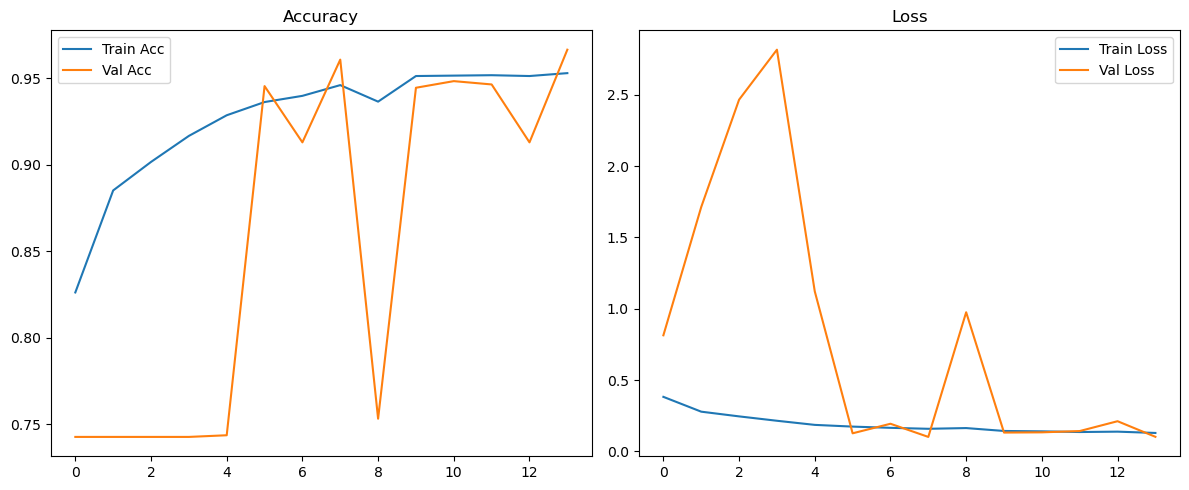

NameError: name 'test_gen' is not defined

In [1]:
# Imports
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Dataset Paths
data_dir = r"C:\\Users\\eyaya\\Downloads\\ChestXRay2017\\chest_xray"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

# Data Augmentation
img_size = (224, 224)
batch_size = 32

data_gen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

train_gen = data_gen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='binary', subset='training')

valid_gen = data_gen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='binary', subset='validation')

# CNN Model built from scratch
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3), padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    GlobalAveragePooling2D(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)

# Training
epochs = 20
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr]
)

# Save the model
model.save("xray_classifier_scratch.h5")





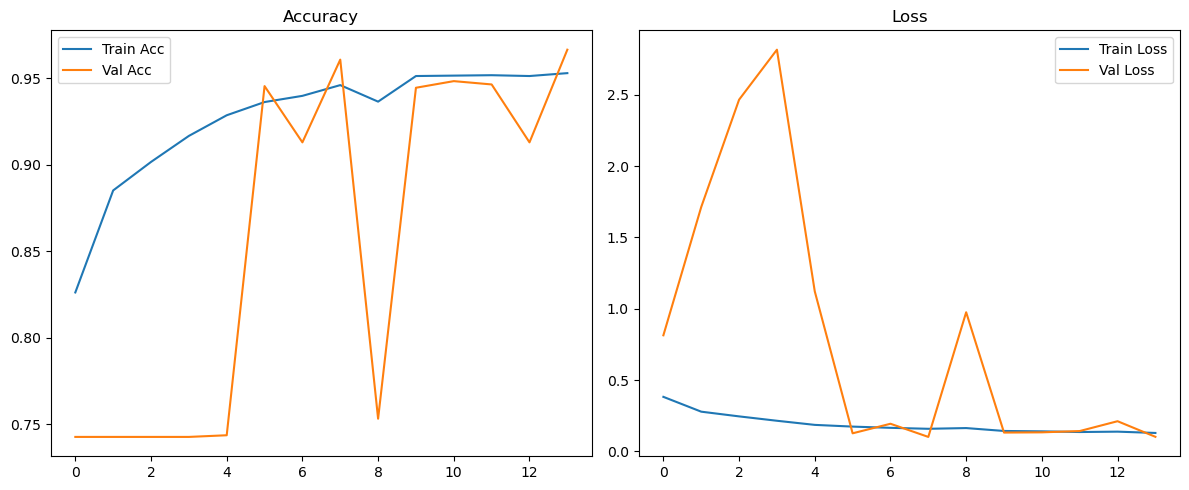

33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 813ms/step - accuracy: 0.9677 - loss: 0.1009
Test Accuracy: 96.27%


NameError: name 'test_gen' is not defined

In [3]:
# Plot training history
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.tight_layout()
plt.show()

# Evaluate on test set
loss, acc = model.evaluate(valid_gen)
print(f"Test Accuracy: {acc*100:.2f}%")

# Predict and generate confusion matrix
y_true = test_gen.classes
y_pred = (model.predict(test_gen) > 0.5).astype("int32")

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys())))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_gen.class_indices.keys(), yticklabels=test_gen.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()